In [1]:
! curl -O https://challenge.blob.core.windows.net/challengefiles/gear_images.zip
! unzip -o -q gear_images.zip
!rm "gear_images/.DS_Store"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33.4M  100 33.4M    0     0   744k      0  0:00:46  0:00:46 --:--:--  719k0:29  0:00:04  0:00:25 1000k 0:00:22  0:00:28  836k   0     0   709k      0  0:00:48  0:00:27  0:00:21  872k
rm: gear_images/.DS_Store: No such file or directory


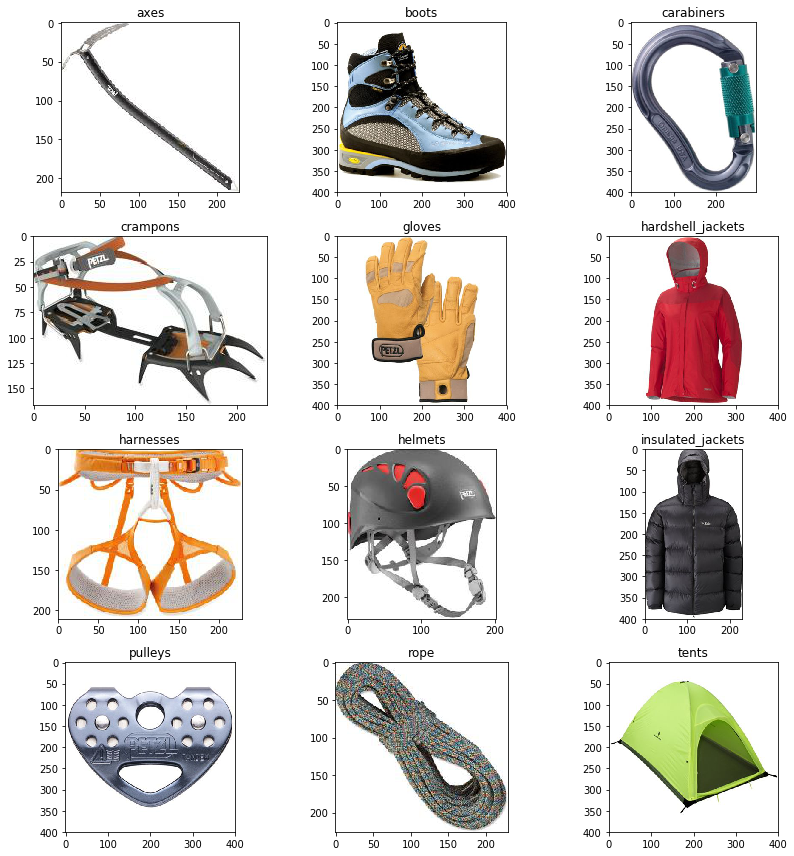

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

rootdir = "gear_images"
fig = plt.figure(figsize=(12,12))

i=1
for folderName in (os.listdir(rootdir)):
    folderPath = os.path.join(rootdir,folderName)
    firstImage = os.listdir(folderPath)[0]
    firstImagePath = os.path.join(rootdir,folderName, firstImage)
    img = Image.open(firstImagePath)
    subplot=fig.add_subplot(4,3,i)
    subplot.set_title(folderName)
    i+=1
    plt.tight_layout()
    plt.imshow(img)

In [2]:
def resize(img): 
    from PIL import Image, ImageOps 
    size = (128,128)
    # Convert RGBA images to RGB
    if np.array(img).shape[2] == 4:
        img = img.convert('RGB')
        
    # resize the image
    img.thumbnail(size, Image.ANTIALIAS)
    newimg = Image.new("RGB", size, (255, 255, 255))
    newimg.paste(img, (int((size[0] - img.size[0]) / 2), int((size[1] - img.size[1]) / 2)))
  
    # return the resized image
    return newimg

In [5]:
!rm "gear_images/.DS_Store"
!rm -rf "resizedGearImages"
!mkdir resizedGearImages
newDir = "resizedGearImages"
import numpy as np
i=0
for folderName in (os.listdir(rootdir)):
    folderPath = os.path.join(rootdir,folderName)
    images = os.listdir(folderPath)
    os.mkdir(os.path.join(newDir,folderName))
    for x in images:
        imagePath = os.path.join(rootdir,folderName, x)
        img = Image.open(imagePath)
        newImg = resize(img)
        newImg.save(os.path.join(newDir,folderName,x),"JPEG")
    print("{} done".format(folderPath))
print("Resizing done")

rm: gear_images/.DS_Store: No such file or directory
gear_images/axes done
gear_images/boots done
gear_images/carabiners done
gear_images/crampons done
gear_images/gloves done
gear_images/hardshell_jackets done
gear_images/harnesses done
gear_images/helmets done
gear_images/insulated_jackets done
gear_images/pulleys done
gear_images/rope done
gear_images/tents done
Resizing done


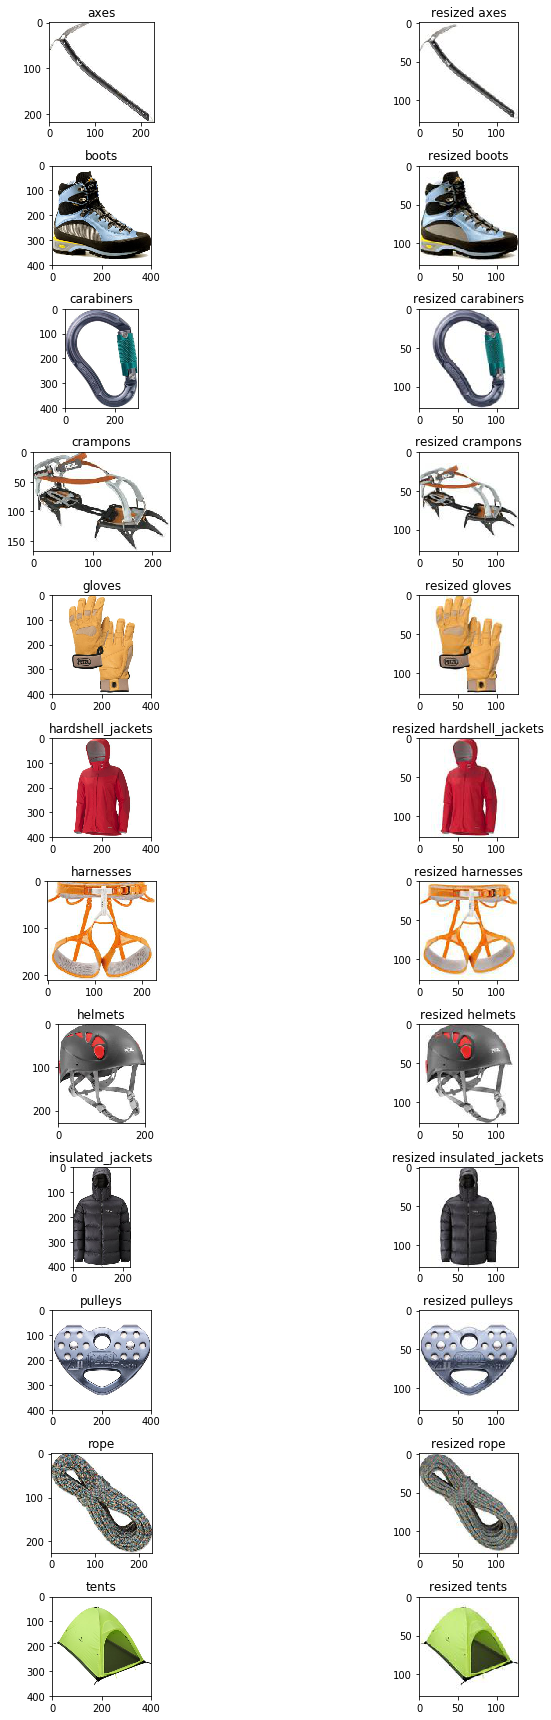

In [124]:
import os
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

rootdir = "gear_images"
resizedDir = "resizedGearImages"

fig = plt.figure(figsize=(12,24))

i=1
for folderName in (os.listdir(rootdir)):
    
    folderPath = os.path.join(rootdir,folderName)
    resizedFolderPath = os.path.join(resizedDir,folderName)
    
    firstImage = os.listdir(folderPath)[0]
    secondImage = os.listdir(resizedFolderPath)[0]
    
    firstImagePath = os.path.join(rootdir,folderName, firstImage)
    secondImagePath = os.path.join(resizedDir,folderName, secondImage)
    
    img = Image.open(firstImagePath)
    imgResized = Image.open(secondImagePath)
    subplot=fig.add_subplot(12,2,i)
    subplot.set_title(folderName)
    i+=1
    plt.tight_layout()
    plt.imshow(img)
    
    subplot=fig.add_subplot(12,2,i)
    subplot.set_title("resized "+folderName)
    i+=1
    plt.tight_layout()
    plt.imshow(imgResized)